In [56]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [75]:
words = open("words_alpha.txt", "r").read().splitlines()

words[1:10]

['aa', 'aaa', 'aah', 'aahed', 'aahing', 'aahs', 'aal', 'aalii', 'aaliis']

In [33]:
b = {}

for w in words:
    chars = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chars, chars[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
    

In [34]:
b

{('<S>', 'a'): 25417,
 ('a', '<E>'): 16373,
 ('a', 'a'): 255,
 ('a', 'h'): 1449,
 ('h', '<E>'): 6069,
 ('h', 'e'): 18798,
 ('e', 'd'): 30879,
 ('d', '<E>'): 30894,
 ('h', 'i'): 14800,
 ('i', 'n'): 60888,
 ('n', 'g'): 29714,
 ('g', '<E>'): 19493,
 ('h', 's'): 836,
 ('s', '<E>'): 75666,
 ('a', 'l'): 40559,
 ('l', '<E>'): 18323,
 ('l', 'i'): 32897,
 ('i', 'i'): 579,
 ('i', '<E>'): 3372,
 ('i', 's'): 36502,
 ('l', 's'): 2966,
 ('a', 'm'): 11453,
 ('m', '<E>'): 10399,
 ('a', 'n'): 40043,
 ('n', 'i'): 22288,
 ('a', 'r'): 31753,
 ('r', 'd'): 5668,
 ('d', 'v'): 375,
 ('v', 'a'): 5020,
 ('r', 'k'): 1927,
 ('k', '<E>'): 3535,
 ('k', 's'): 1770,
 ('d', 'w'): 494,
 ('w', 'o'): 3246,
 ('o', 'l'): 18296,
 ('l', 'f'): 946,
 ('f', '<E>'): 1172,
 ('l', 'v'): 1090,
 ('v', 'e'): 17745,
 ('e', 's'): 46929,
 ('r', 'g'): 3256,
 ('g', 'h'): 2864,
 ('r', 'o'): 31100,
 ('o', 'n'): 47067,
 ('n', '<E>'): 25638,
 ('i', 'c'): 35999,
 ('c', '<E>'): 13690,
 ('c', 'a'): 23273,
 ('i', 't'): 24854,
 ('t', 'e'): 44229,


In [35]:
sorted(b.items(), key = lambda kv: -kv[1])

[(('s', '<E>'), 75666),
 (('e', 'r'), 66714),
 (('i', 'n'), 60888),
 (('e', '<E>'), 56959),
 (('t', 'i'), 49645),
 (('o', 'n'), 47067),
 (('e', 's'), 46929),
 (('t', 'e'), 44229),
 (('a', 't'), 42056),
 (('a', 'l'), 40559),
 (('a', 'n'), 40043),
 (('r', 'e'), 40023),
 (('<S>', 's'), 38764),
 (('e', 'n'), 38436),
 (('y', '<E>'), 36777),
 (('i', 's'), 36502),
 (('i', 'c'), 35999),
 (('r', 'i'), 35622),
 (('r', 'a'), 35216),
 (('<S>', 'p'), 34860),
 (('l', 'e'), 34576),
 (('s', 't'), 34122),
 (('l', 'i'), 32897),
 (('n', 'e'), 32262),
 (('<S>', 'c'), 32107),
 (('a', 'r'), 31753),
 (('r', 'o'), 31100),
 (('d', '<E>'), 30894),
 (('e', 'd'), 30879),
 (('n', 'g'), 29714),
 (('n', 't'), 29533),
 (('o', 'r'), 28809),
 (('u', 'n'), 27615),
 (('n', '<E>'), 25638),
 (('<S>', 'a'), 25417),
 (('l', 'a'), 25052),
 (('i', 't'), 24854),
 (('c', 'o'), 24157),
 (('c', 'a'), 23273),
 (('<S>', 'u'), 22766),
 (('n', 'i'), 22288),
 (('d', 'e'), 22148),
 (('i', 'o'), 22038),
 (('t', 'o'), 21357),
 (('t', 'a')

In [36]:
# lookup tables

characters = sorted(list(set("".join(words))))
stoi = {s : i + 1 for i, s in enumerate(characters)}
stoi["."] = 0
itos = {i : s for s, i in stoi.items()}

In [37]:
N = torch.zeros(len(characters) + 1, len(characters) + 1, dtype=torch.int32)

In [38]:
for w in words:
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars, chars[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

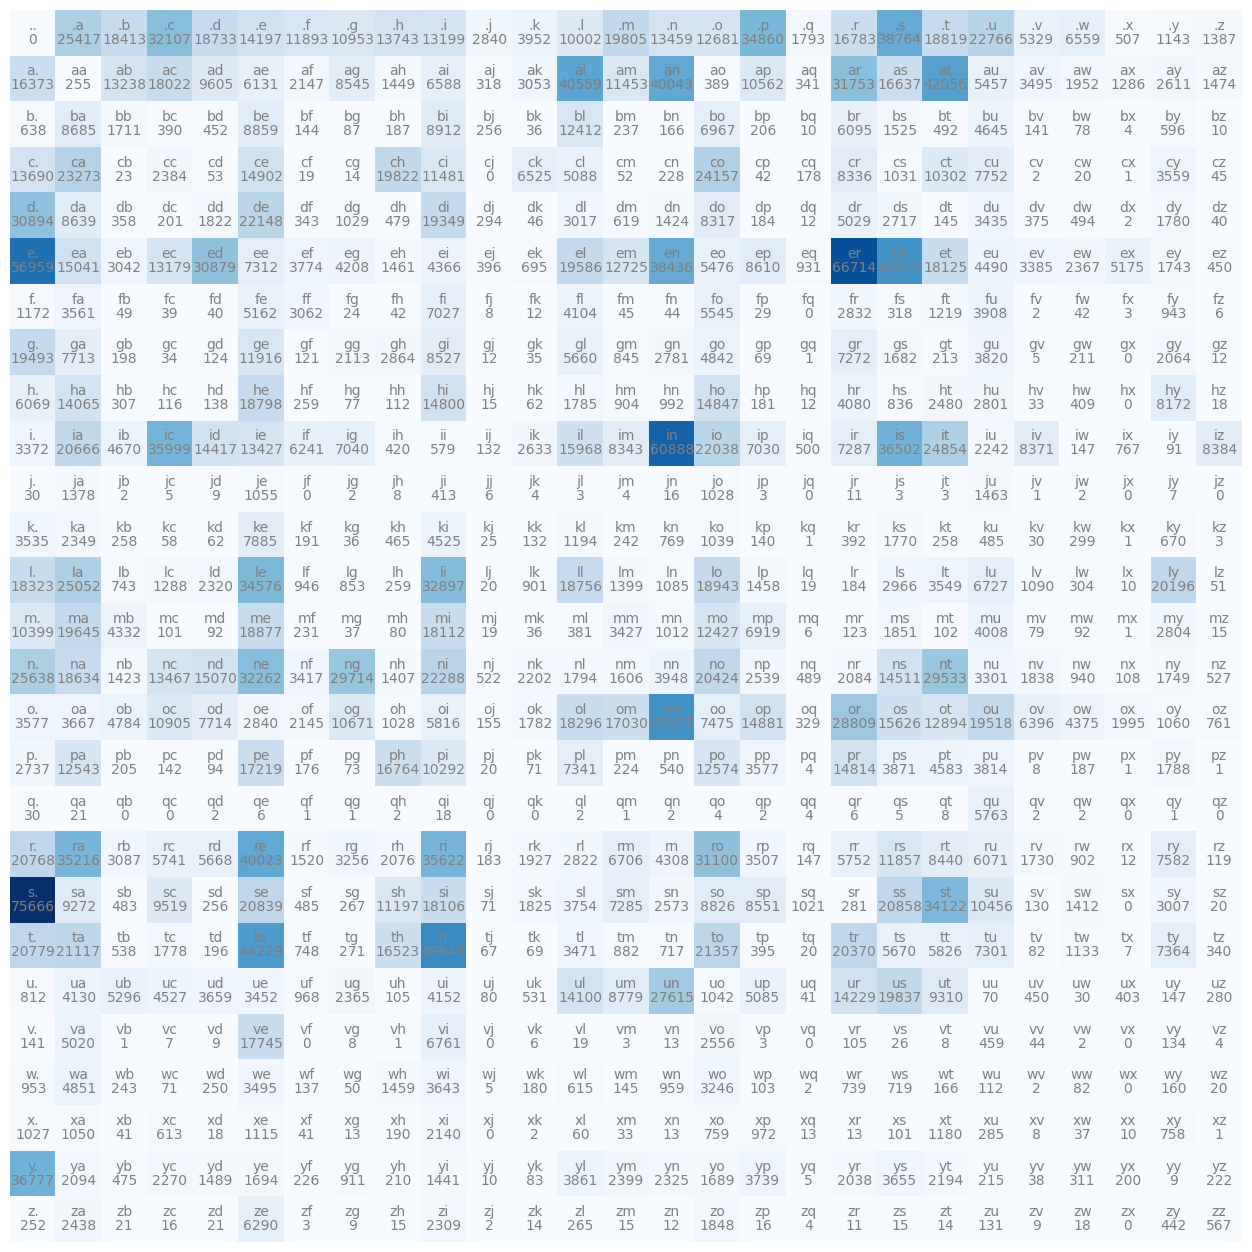

In [39]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [40]:
p = N[0].float()
p = p/sum(p)
p

tensor([0.0000, 0.0687, 0.0498, 0.0868, 0.0506, 0.0384, 0.0321, 0.0296, 0.0371,
        0.0357, 0.0077, 0.0107, 0.0270, 0.0535, 0.0364, 0.0343, 0.0942, 0.0048,
        0.0453, 0.1047, 0.0508, 0.0615, 0.0144, 0.0177, 0.0014, 0.0031, 0.0037])

In [41]:
g = torch.Generator().manual_seed(2)
i = torch.multinomial(p, num_samples = 1, replacement = True, generator = g).item()
itos[i]

's'

In [49]:
P = (N + 1).float() # N + 1 for model smoothing, to not get inf probabilities
P /= P.sum(1, keepdim=True)

In [50]:
g = torch.Generator().manual_seed(3)

words = []

for i in range(10):
  i = 0
  while True:
      p = P[i]
      i = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
      words.append(itos[i])
      if (i == 0):
          break 
      
print("".join(words))

peldatobachaplarabliceredividee.itizalerer.bontemaperblitoscelice.deatoryifon.aneriromppommasacrrra.fal.skenshavie.plusceridn.ceticcrero.ns.


In [52]:
log_likelihood = 0.0
n = 0
for w in words:
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars, chars[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        prob = P[i1, i2]
        logprob = torch.log(prob)
        n += 1
        log_likelihood += logprob
        
avg_nll = (-log_likelihood) / n
print(f'{avg_nll=}')

avg_nll=tensor(3.6563)


<h1>Doing the same using neural networks</h1>

In [144]:
# constructing dataset using bigrams

X, y = [], []

for w in words:
    chars = ["."] + list(w) + ["."]
    for ch1, ch2 in zip(chars, chars[1:]):
        i1 = stoi[ch1]
        i2 = stoi[ch2]
        
        X.append(i1)
        y.append(i2)

X = torch.tensor(X)
y = torch.tensor(y)
num = X.nelement()

X_enc = F.one_hot(X, num_classes=27).float() # one hot encoded vectors

<h1>Neural network framework</h1>

In [ ]:
W = torch.randn((27, 27), generator = g, requires_grad = True) # initialize weights matrix

# gradient descent
for i in range(100):
    # forward pass
    logits = X_enc @ W # interpret - log counts 
    # following two lines are called softmax
    counts = logits.exp() # equivalent to N matrix
    probs = counts / counts.sum(1, keepdims = True) # equivalent to P matrix
    loss = -probs[torch.arange(num), y].log().mean()
    
    # regularization (equivalent to smoothing in non-neural network bigram model)
    # loss = -probs[torch.arange(num), y].log().mean() + (0.01 * (W**2).mean())

    # backward pass
    W.grad = None
    loss.backward()

    #update
    W.data += -50 * W.grad
    
    print(loss)

tensor(3.8809, grad_fn=<NegBackward0>)
tensor(3.5555, grad_fn=<NegBackward0>)
tensor(3.3338, grad_fn=<NegBackward0>)
tensor(3.1753, grad_fn=<NegBackward0>)
tensor(3.0606, grad_fn=<NegBackward0>)
tensor(2.9764, grad_fn=<NegBackward0>)
tensor(2.9132, grad_fn=<NegBackward0>)
tensor(2.8645, grad_fn=<NegBackward0>)
tensor(2.8259, grad_fn=<NegBackward0>)
tensor(2.7949, grad_fn=<NegBackward0>)
tensor(2.7696, grad_fn=<NegBackward0>)
tensor(2.7487, grad_fn=<NegBackward0>)
tensor(2.7313, grad_fn=<NegBackward0>)
tensor(2.7166, grad_fn=<NegBackward0>)
tensor(2.7039, grad_fn=<NegBackward0>)
tensor(2.6930, grad_fn=<NegBackward0>)
tensor(2.6834, grad_fn=<NegBackward0>)
tensor(2.6749, grad_fn=<NegBackward0>)
tensor(2.6674, grad_fn=<NegBackward0>)
tensor(2.6607, grad_fn=<NegBackward0>)
tensor(2.6546, grad_fn=<NegBackward0>)
tensor(2.6490, grad_fn=<NegBackward0>)
tensor(2.6440, grad_fn=<NegBackward0>)
tensor(2.6394, grad_fn=<NegBackward0>)
tensor(2.6352, grad_fn=<NegBackward0>)
tensor(2.6312, grad_fn=<N

In [214]:
# new sampling using neural net

words = []

for i in range(10):
  i = 0
  while True:
      X_enc = F.one_hot(torch.tensor([i]), num_classes = 27).float() # one hot encoding
      logits = X_enc @ W # log counts
      counts = logits.exp() # counts
      p = counts / counts.sum(1, keepdim = True) # probabilities

      i = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
      words.append(itos[i])
      if (i == 0):
          break 
      
print("".join(words))

preratening.aloielid.rxacropogonffe.crorn.d.aralalledia.plicet.una.wthy.ese.
